In [46]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Alpha cases
alphas = [r'$\alpha$=0', r'$\alpha$=$\alpha_{MAX}$']

metric_name = "Top-1 Accuracy"
y_label = "Accuracy"
y_lim = (0.0, 100.0)   # percentage scale

# DATASET
dataset = "CIFAR100"
# Model
model_name = "ViT_Swin"

# RE accuracies
# CIFAR10
# accuracies = {
#     "ViT-B/16":  [98.15, 10.00],
#     "ViT-B/32":  [97.36, 10.00],
#     "ViT-L/16":  [98.06, 10.00],
#     "ViT-L/32":  [98.11, 10.00],
#     "Swin-T":    [98.02,  8.36],
#     "Swin-S":    [98.31, 11.82],
#     "Swin-B":    [98.10,  9.49],
#     "SwinV2-T":  [97.71, 11.71],
#     "SwinV2-S":  [98.18, 12.04],
#     "SwinV2-B":  [98.46,  9.40],
# }

# CIFAR100
accuracies = {
    "ViT-B/16":  [87.26, 1.00],
    "ViT-B/32":  [86.30, 1.00],
    "ViT-L/16":  [87.25, 1.00],
    "ViT-L/32":  [87.32, 1.00],
    "Swin-T":    [87.56, 1.05],
    "Swin-S":    [89.20, 0.83],
    "Swin-B":    [89.18, 1.03],
    "SwinV2-T":  [87.23, 1.30],
    "SwinV2-S":  [88.85, 1.41],
    "SwinV2-B":  [88.63, 1.33],
}

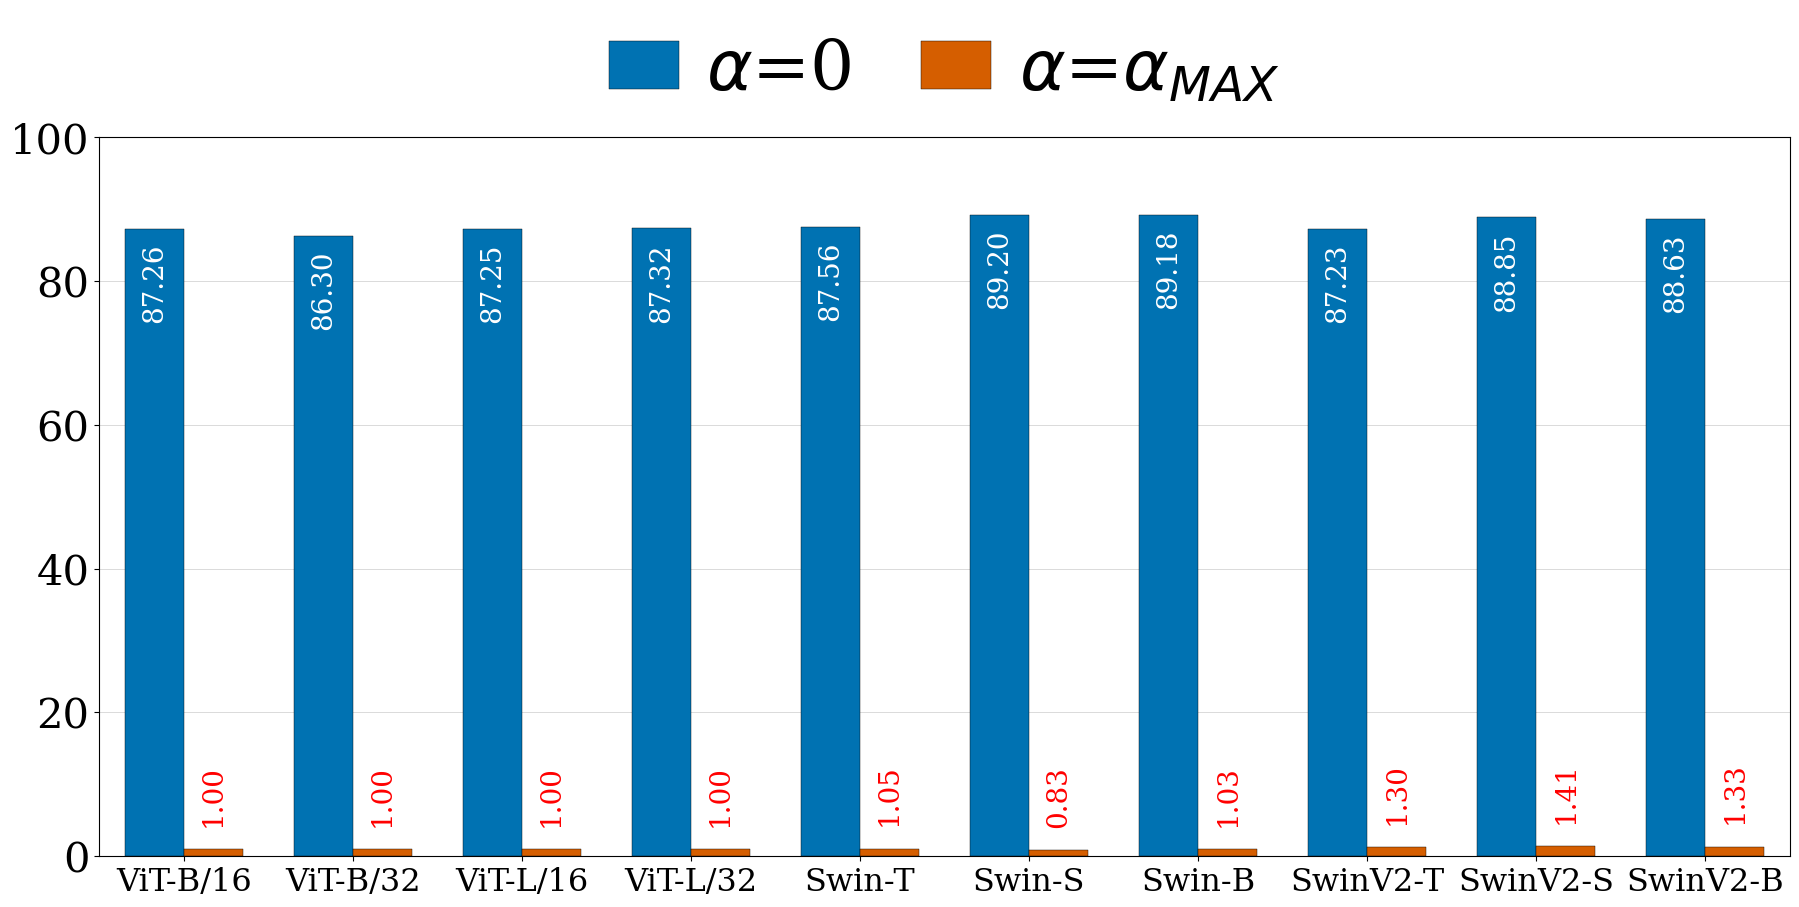

In [ ]:
mpl.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman", "Times", "DejaVu Serif"],
    "axes.labelsize": 20,
    "xtick.labelsize": 23,
    "ytick.labelsize": 30,
    "legend.fontsize": 50,
    "axes.titlesize": 20,
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
    "axes.spines.top": True,
    "axes.spines.right": True,
})

alpha_colors = ['#0072B2', '#D55E00']
palette = dict(zip(alphas, alpha_colors))

models = ["ViT-B/16", "ViT-B/32", "ViT-L/16", "ViT-L/32", "Swin-T", "Swin-S", "Swin-B", "SwinV2-T", "SwinV2-S", "SwinV2-B"]
n_models = len(models)
n_alpha = len(alphas)

fig_width_in = 18
fig_height_in = 9
fig, ax = plt.subplots(figsize=(fig_width_in, fig_height_in))
fig.patch.set_facecolor("white")

bar_w = 0.35
group_centers = np.arange(n_models)
offsets = (np.arange(n_alpha) - (n_alpha - 1) / 2.0) * bar_w

fmt = "{:.2f}"
for i, a_lab in enumerate(alphas):
    vals = [accuracies[m][i] for m in models]
    x = group_centers + offsets[i]
    bars = ax.bar(
        x, vals, width=bar_w, label=a_lab,
        color=palette[a_lab], edgecolor='black', linewidth=0.3, zorder=3
    )
    for b, v in zip(bars, vals):
        x_txt = b.get_x() + b.get_width() / 2.0
        y_txt = v - 7.5 if v > 20 else v + 7.5
        ax.text(
            x_txt, y_txt, fmt.format(v),
            ha='center', va='center',
            rotation=90,
            fontsize=20,
            clip_on=False,
            color='white' if v > 20 else 'red'
        )

ax.set_xticks(group_centers)
ax.set_xticklabels(models)
ax.set_ylim(*y_lim)
ax.set_xlim(-0.5, n_models - 0.5)
ax.margins(x=0.02)

ax.grid(axis='y', which='major', linestyle='-', linewidth=0.5, color='0.80')
ax.set_axisbelow(True)

ax.legend(
    ncol=n_alpha, loc='lower center', bbox_to_anchor=(0.5, 0.96),
    frameon=False, handlelength=1.0, columnspacing=1.0, handletextpad=0.4, title=None
)

plt.tight_layout(pad=0.4)

pdf_name = f"{dataset}-{model_name}-Obfuscated_Model_Accuracy.pdf"
fig.savefig(pdf_name, bbox_inches="tight", pad_inches=0.02)
plt.show()
plt.close(fig)
